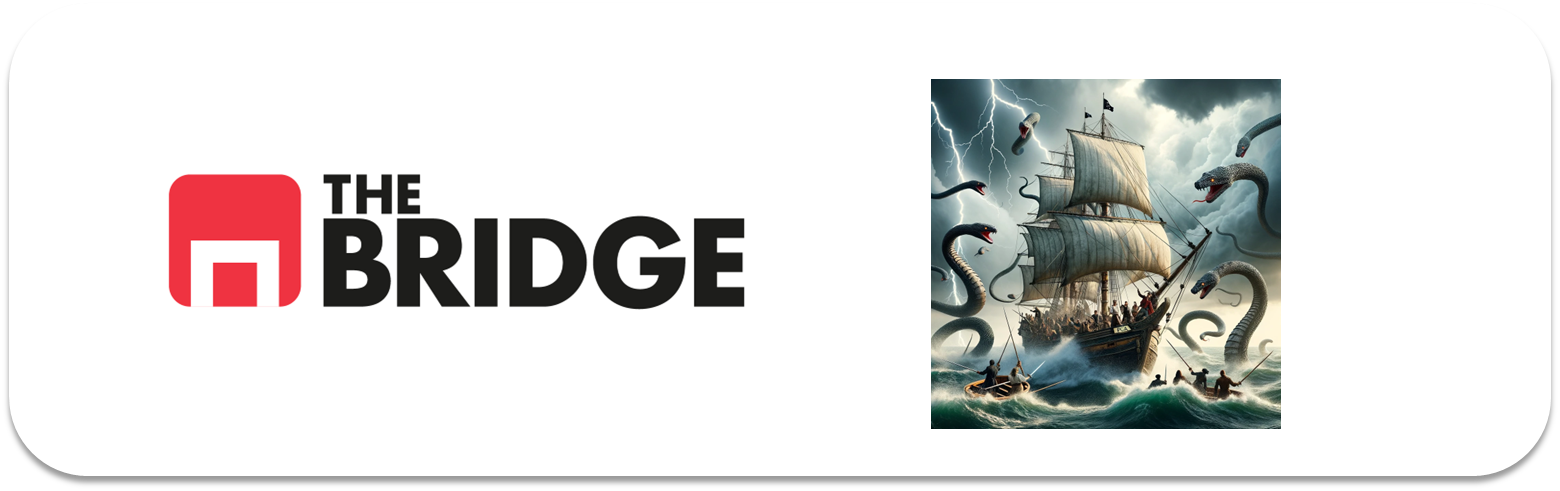

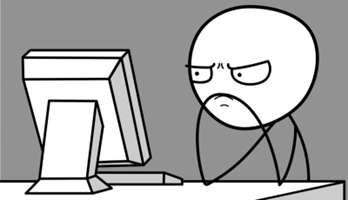

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [2]:
df = pd.read_csv('./data/breastcancer-winsconsin.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.diagnosis.value_counts(True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [5]:
df.drop(columns=['id', 'Unnamed: 32'], inplace = True)

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [6]:
from sklearn.model_selection import  train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

<Axes: xlabel='diagnosis', ylabel='percent'>

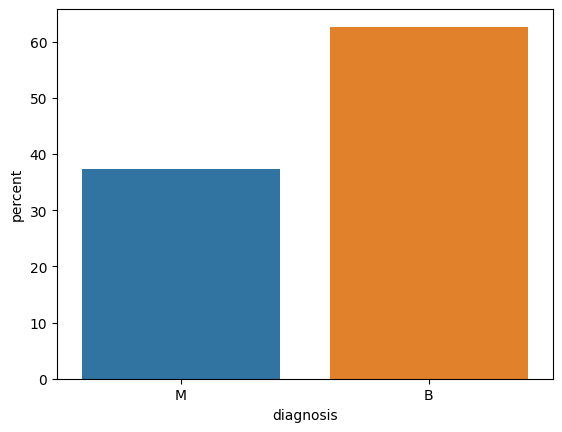

In [7]:
sns.countplot(x = 'diagnosis', data =train_set, hue = 'diagnosis', stat = 'percent')

In [8]:
features = train_set.columns.to_list()
features.remove('diagnosis')

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

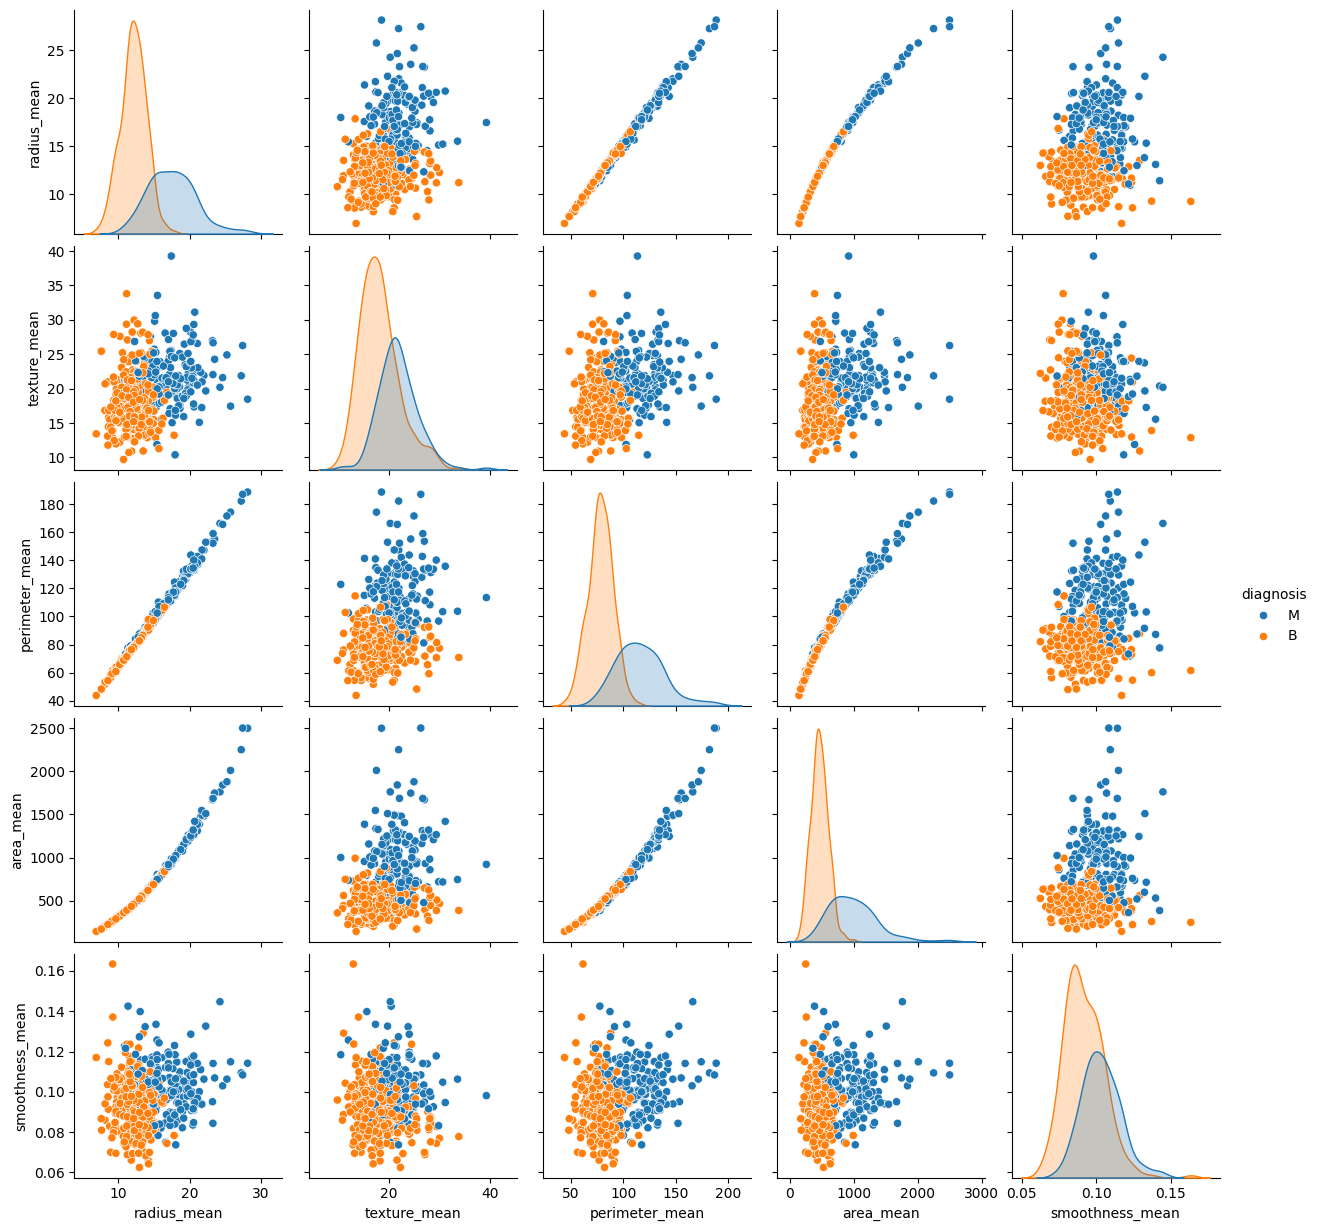

In [9]:
sns.pairplot(train_set[features[0:5] + ['diagnosis']], hue = 'diagnosis')

In [10]:
feat_num = []
feat_num.append(features[0:5])
feat_num

[['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean']]

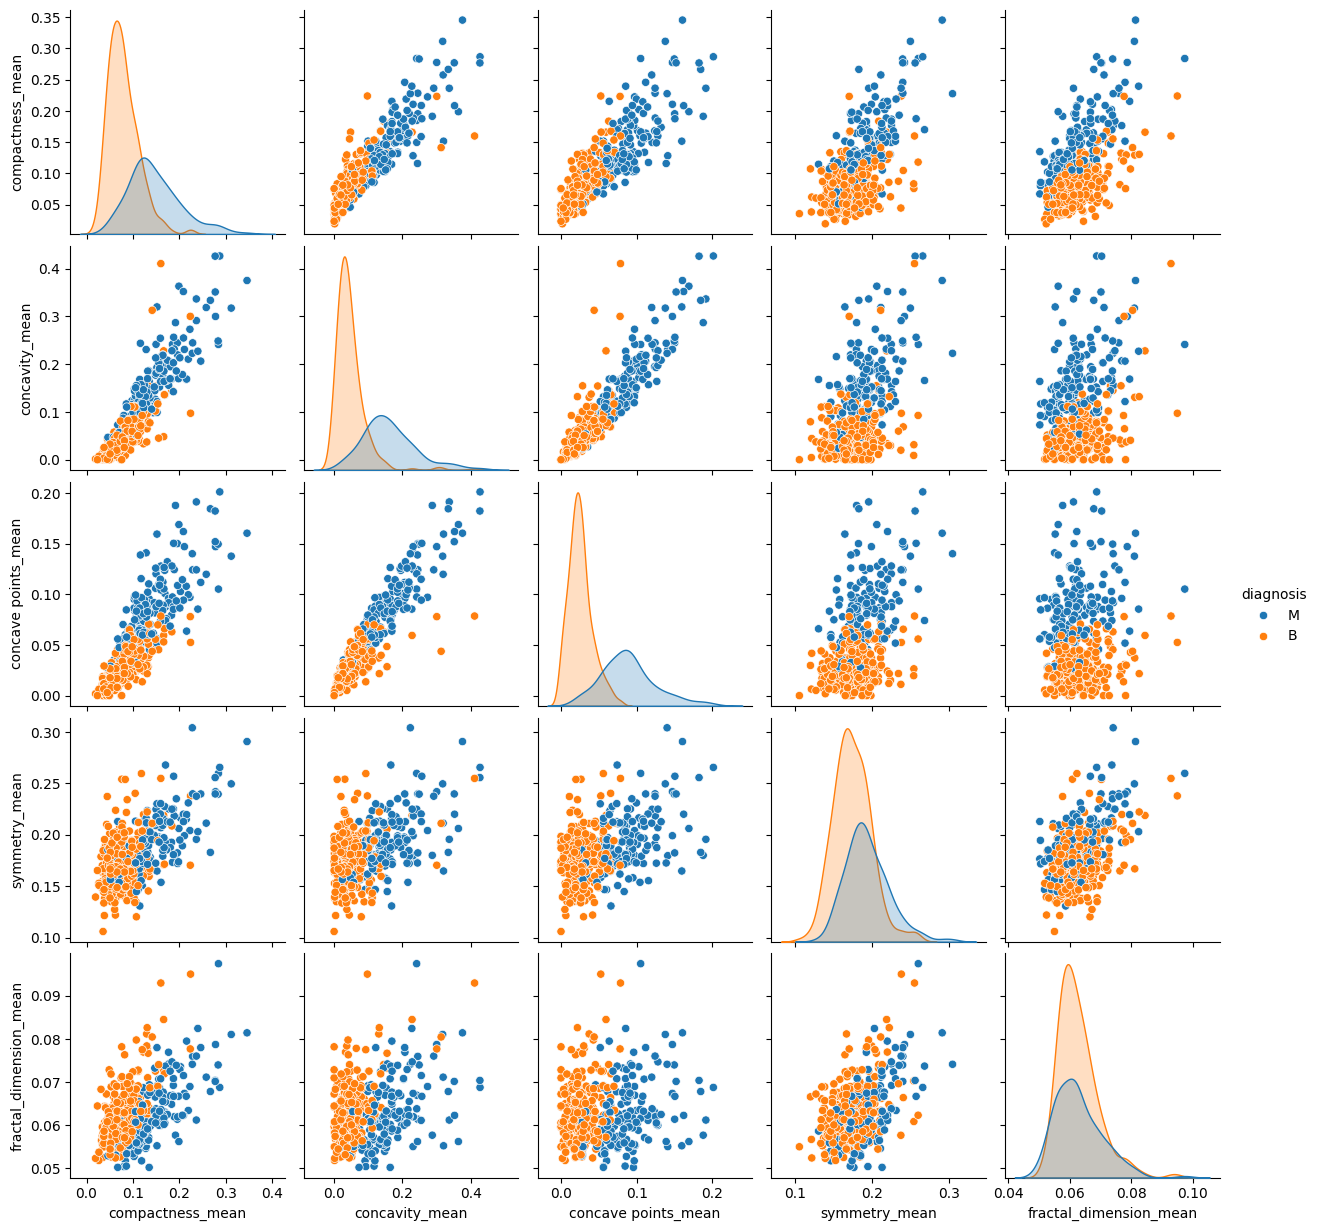

In [11]:
sns.pairplot(train_set[features[5:10] + ['diagnosis']], hue = 'diagnosis')

In [15]:
feat_num.append(features[5:8])
feat_num

[['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean'],
 ['compactness_mean', 'concavity_mean', 'concave points_mean']]

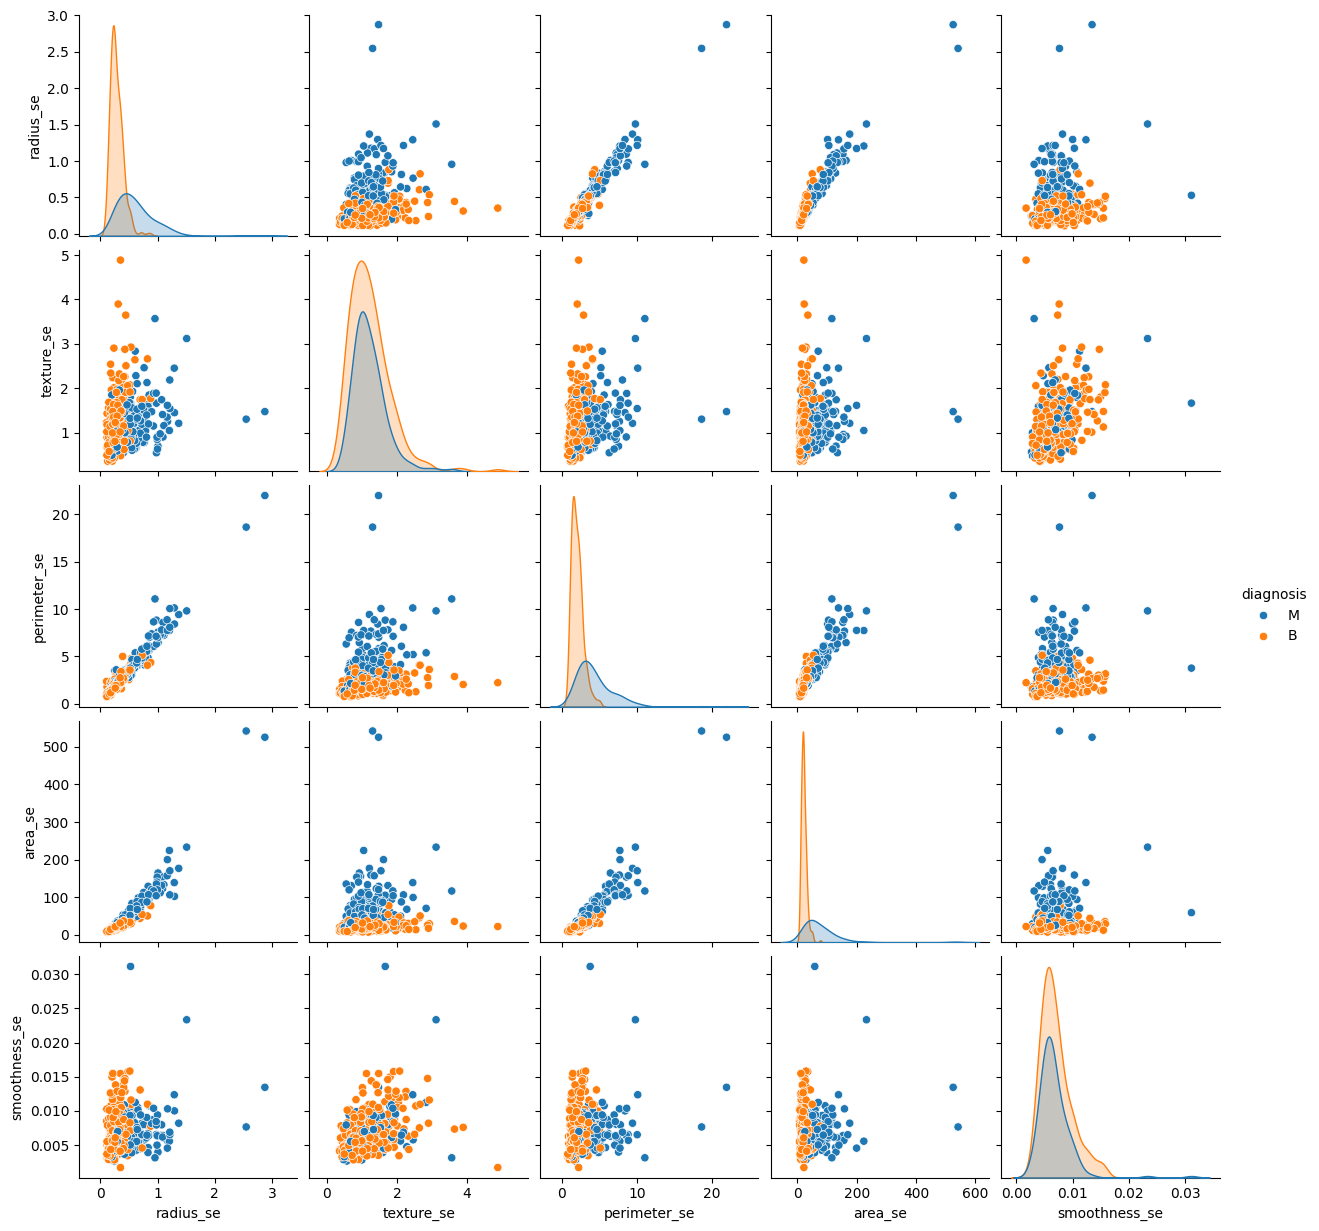

In [16]:
sns.pairplot(train_set[features[10:15] + ['diagnosis']], hue = 'diagnosis')

In [17]:
feat_num.append(['radius_se', 'perimeter_se', 'area_se'])

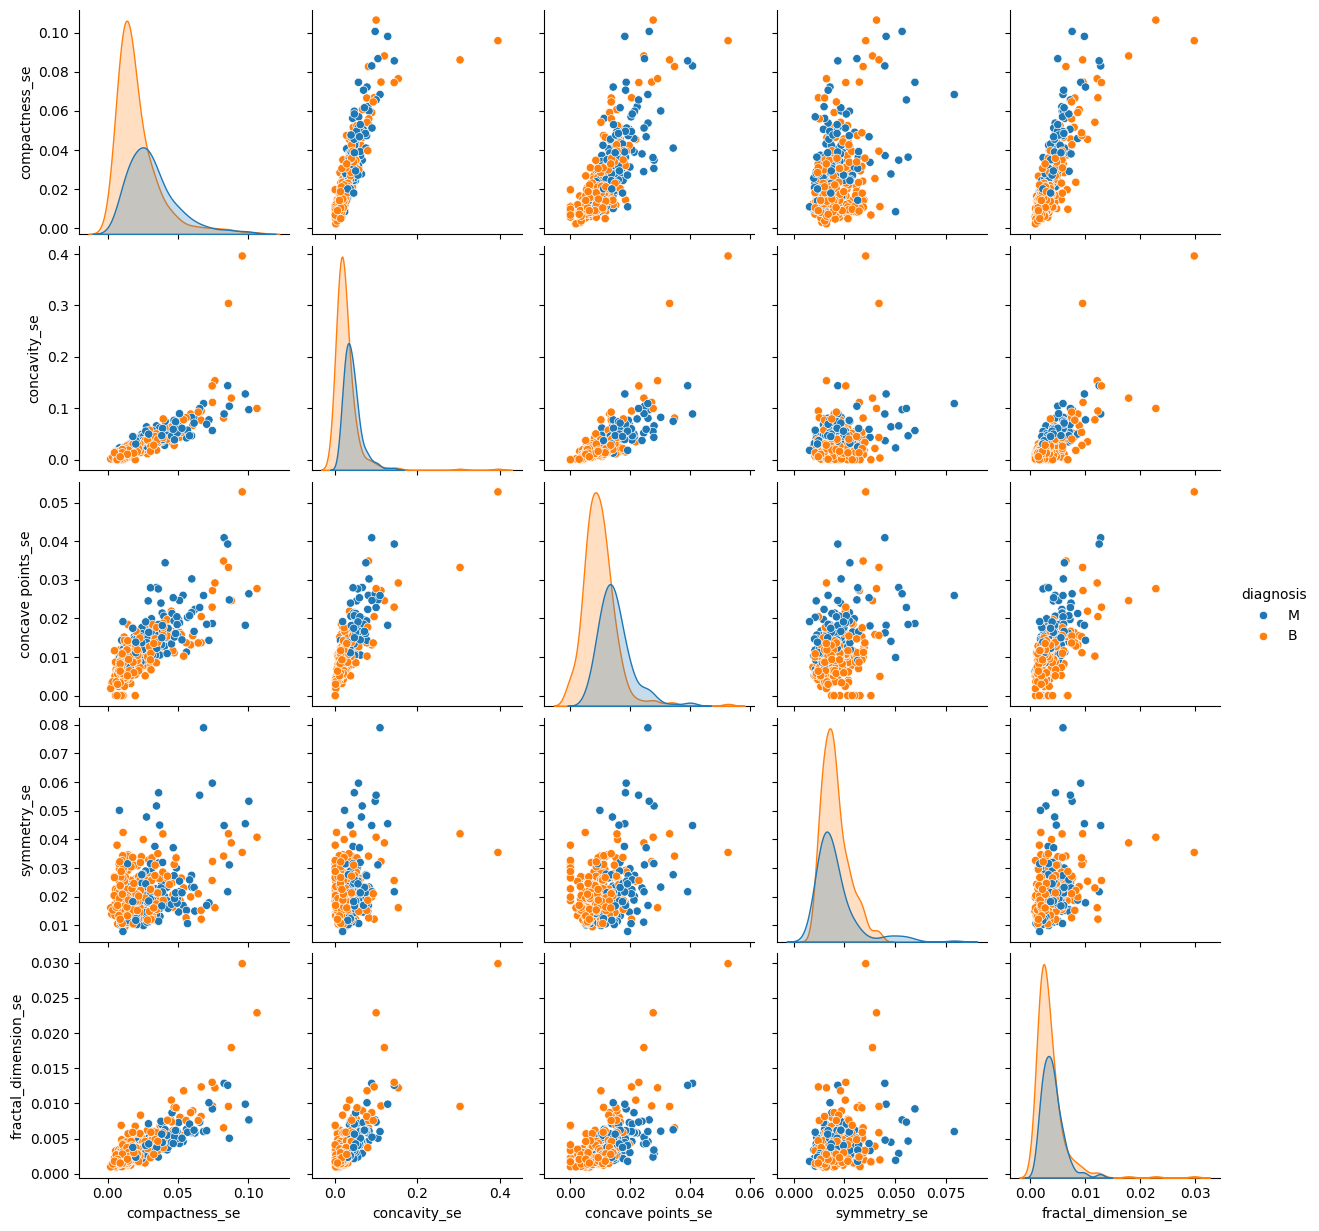

In [18]:
sns.pairplot(train_set[features[15:20] + ['diagnosis']], hue = 'diagnosis')

In [20]:
feat_num.append(['compactness_se', 'concave points_se'])

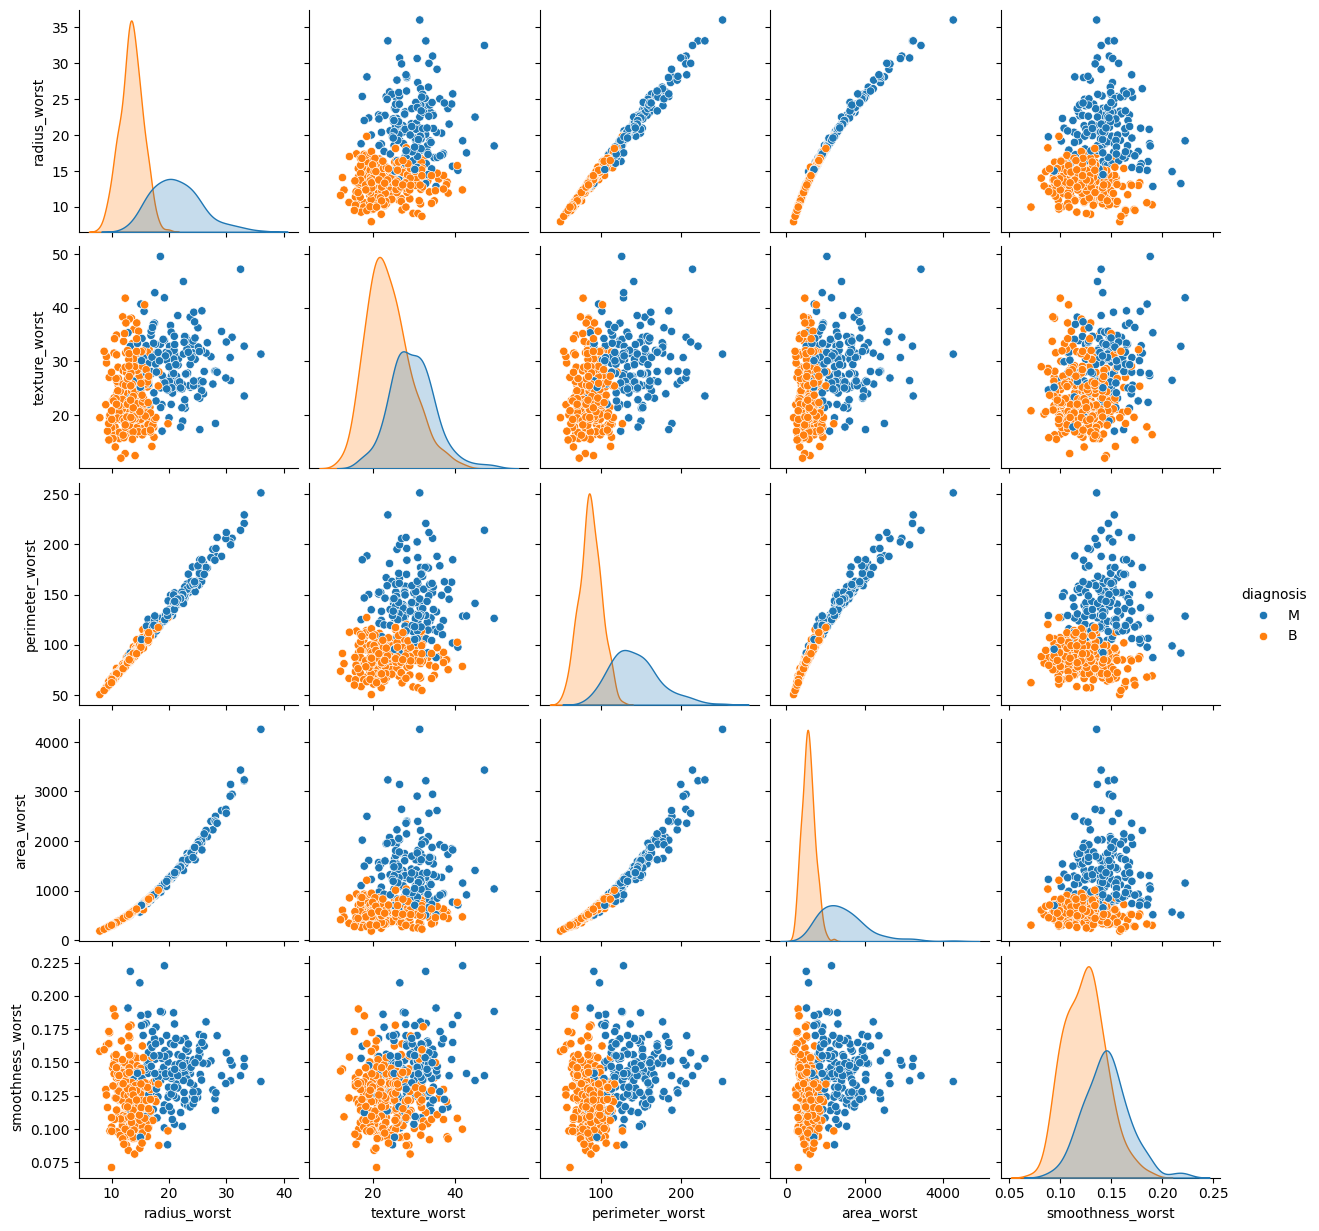

In [26]:
sns.pairplot(train_set[features[20:25] + ['diagnosis']], hue = 'diagnosis')

In [28]:
feat_num.append(features[20:25])

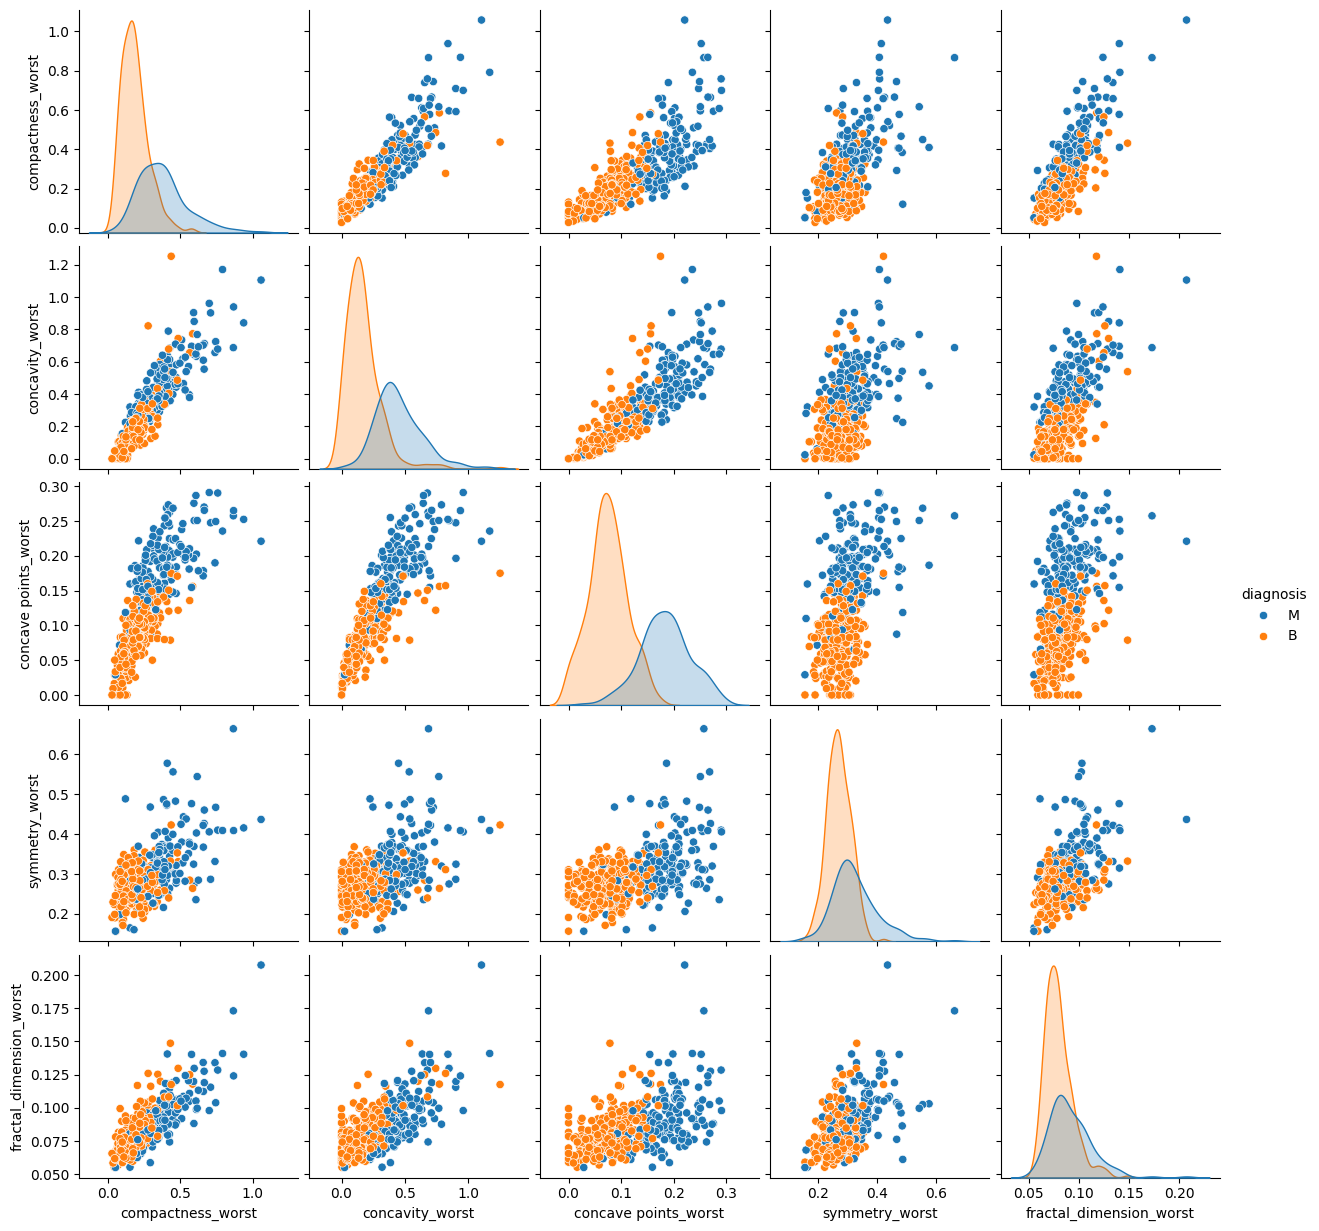

In [32]:
sns.pairplot(train_set[features[25:] + ['diagnosis']], hue = 'diagnosis')

In [33]:
feat_num.append(features[25:])

In [34]:
feat_select = []
for x in feat_num:
    for y in x:
        feat_select.append(y)

In [35]:
print(len(feat_select))
feat_select

23


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

In [71]:
target = 'diagnosis'


In [38]:
dic = {'M' : 1, "B": 0}
train_set['target_num'] = train_set['diagnosis'].map(dic)

In [41]:
corr = train_set[feat_select].corr()

<Axes: >

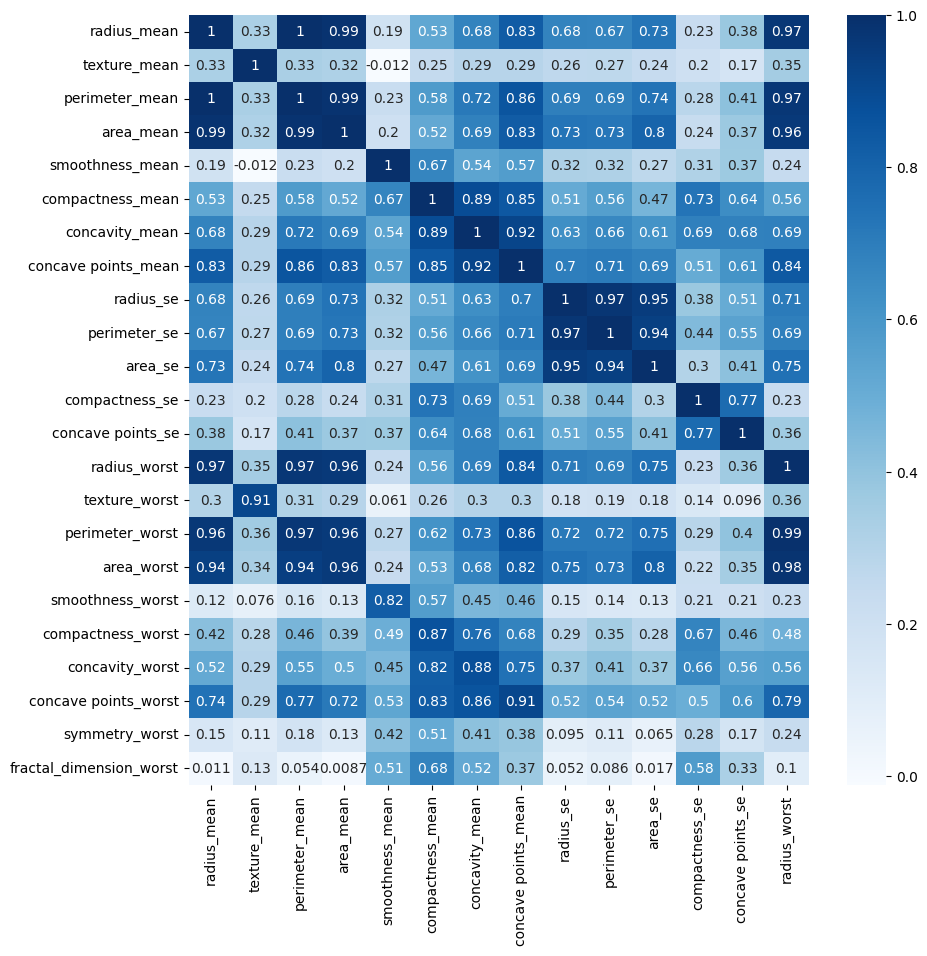

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[feat_select[0:14]], annot =True, cmap= "Blues")

In [ ]:
lista = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst']
for x in lista:
    feat_select.remove(x)

In [68]:
corr.drop(columns=lista, inplace=True)


<Axes: >

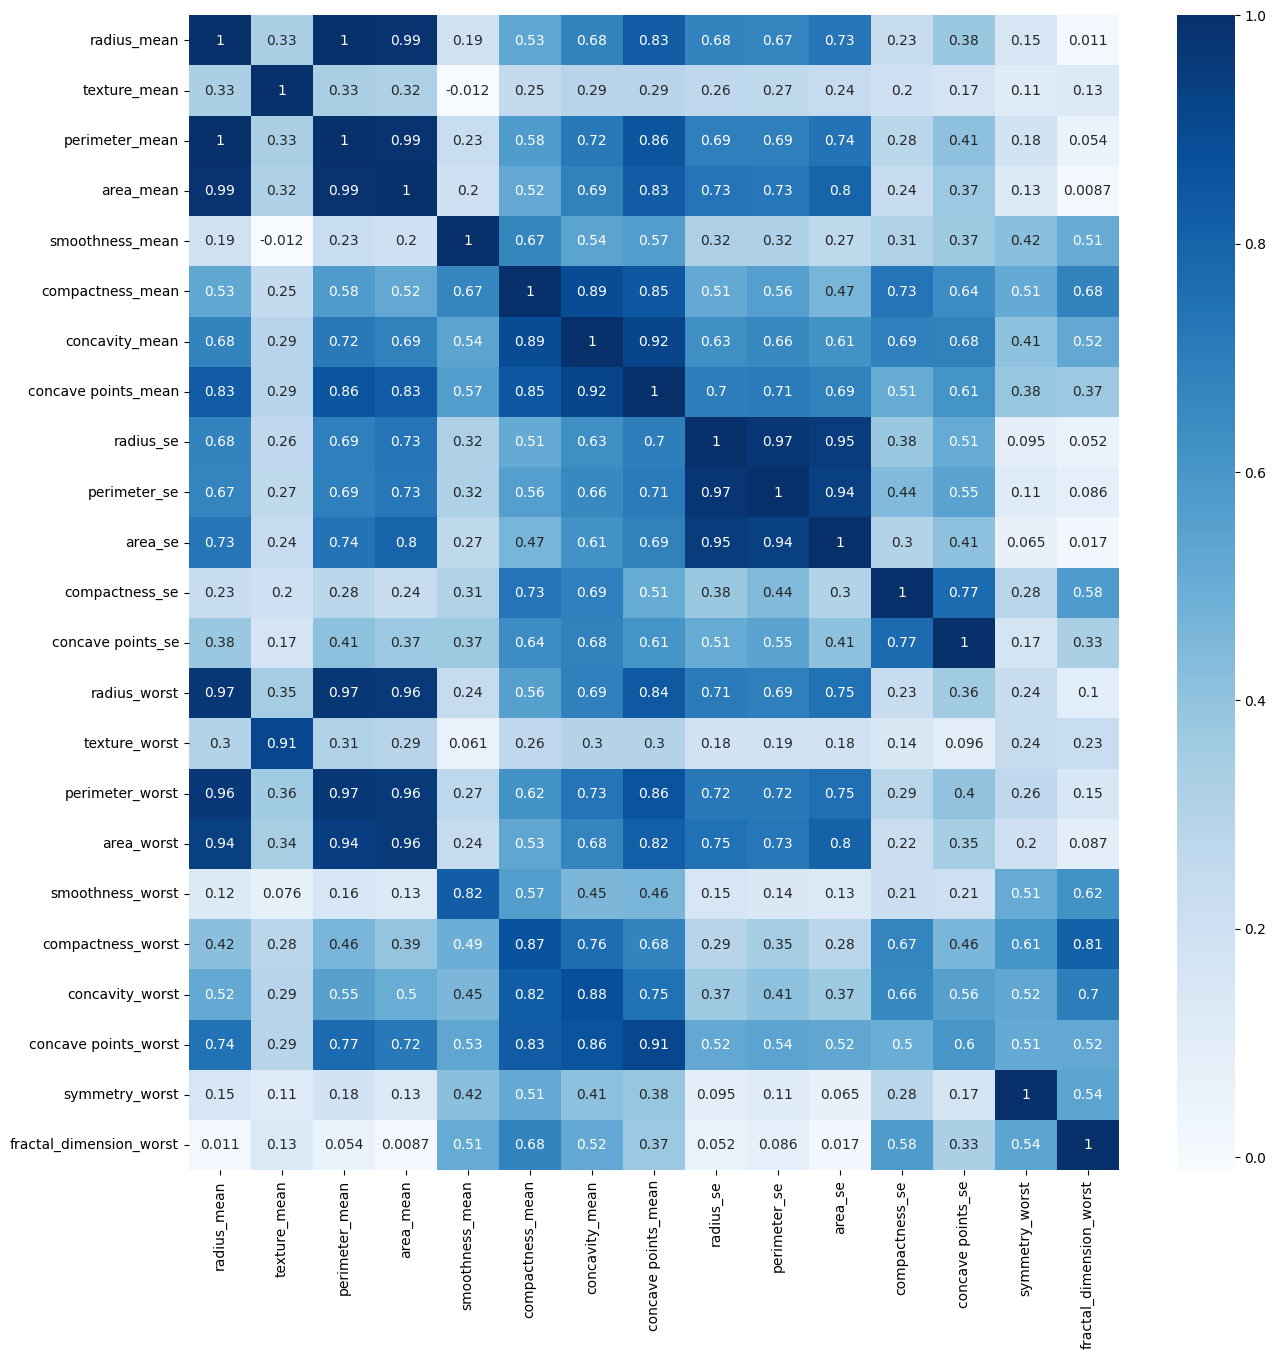

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot =True, cmap= "Blues")

In [ ]:
feat_select

15

In [78]:
train_set.drop('target_num', axis = 1, inplace =True)

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [81]:
X_train = train_set.drop(target, axis = 1)
y_train= train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [82]:
resultados = {}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf_all = RandomForestClassifier(max_depth = 5, random_state= 42)
score = np.mean(cross_val_score(rf_clf_all, X_train, y_train, cv = 5, scoring = 'balanced_accuracy'))
resultados['todas_feat'] = score

In [83]:
resultados

{'todas_feat': np.float64(0.9506707946336428)}

### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

<Axes: >

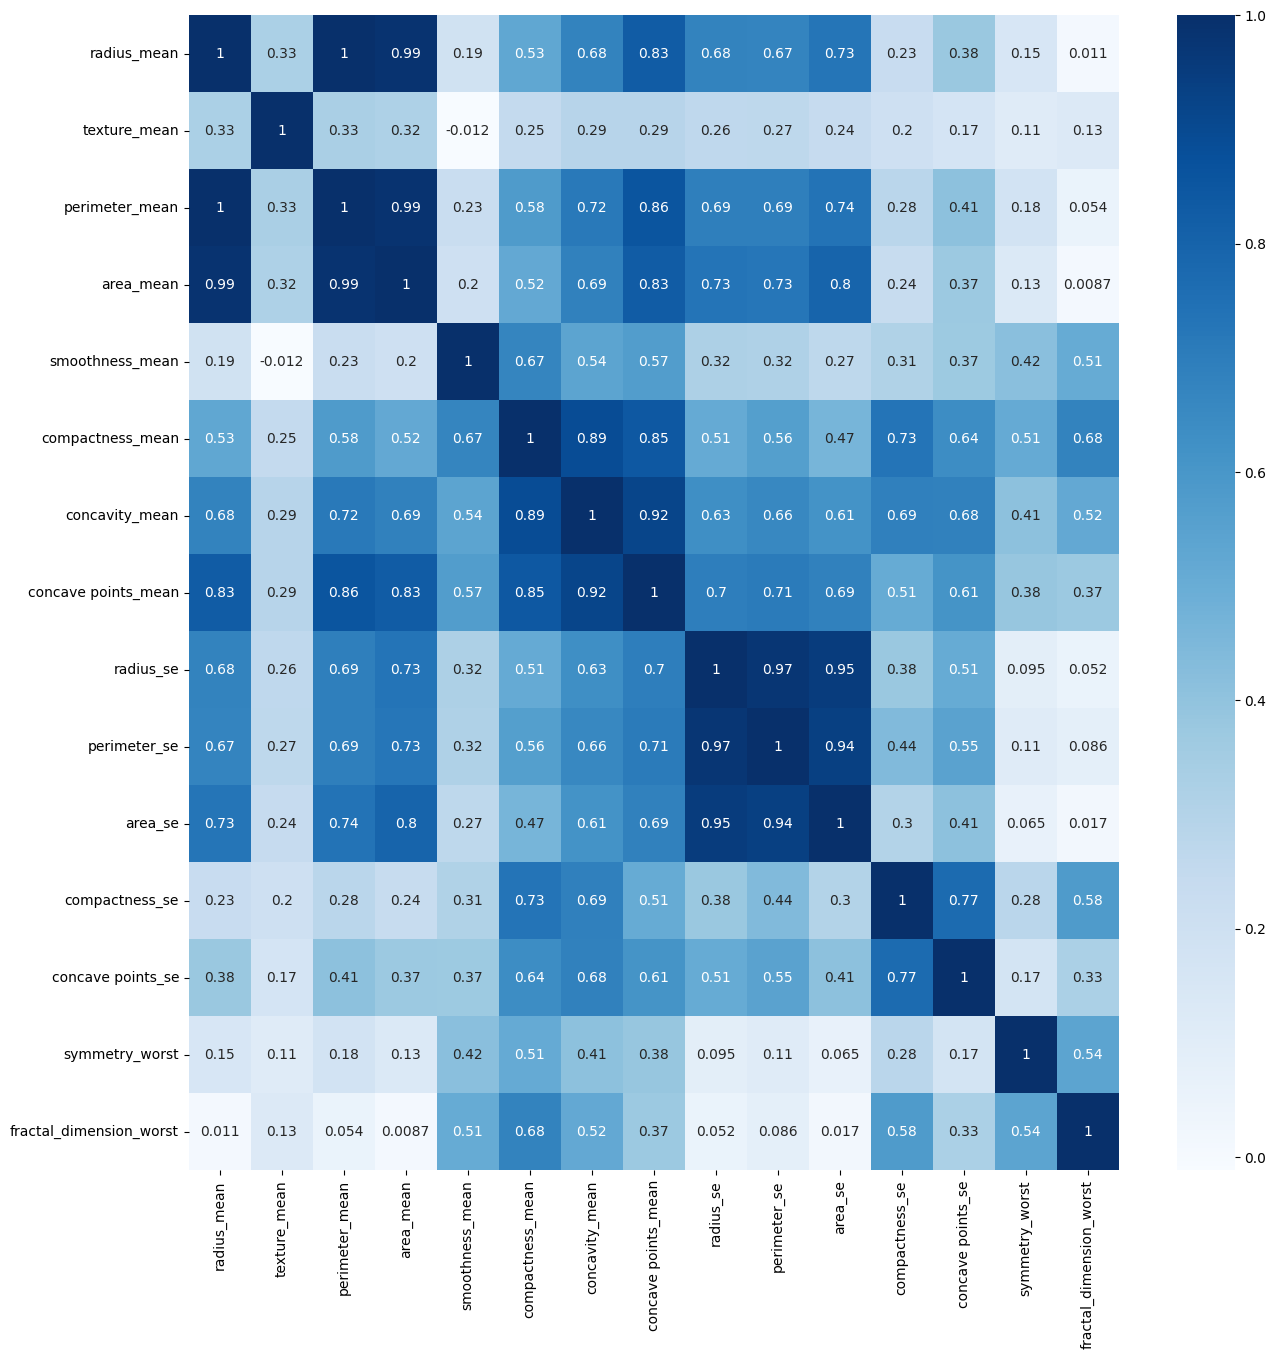

In [87]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[feat_select].corr(), annot=True, cmap= 'Blues')

In [88]:
list = ['perimeter_mean', 'area_mean','perimeter_se','area_se', 'concave points_mean']
feat_segunda = [col for col in feat_select if col not in list]

In [89]:
feat_segunda

['radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'radius_se',
 'compactness_se',
 'concave points_se',
 'symmetry_worst',
 'fractal_dimension_worst']

<Axes: >

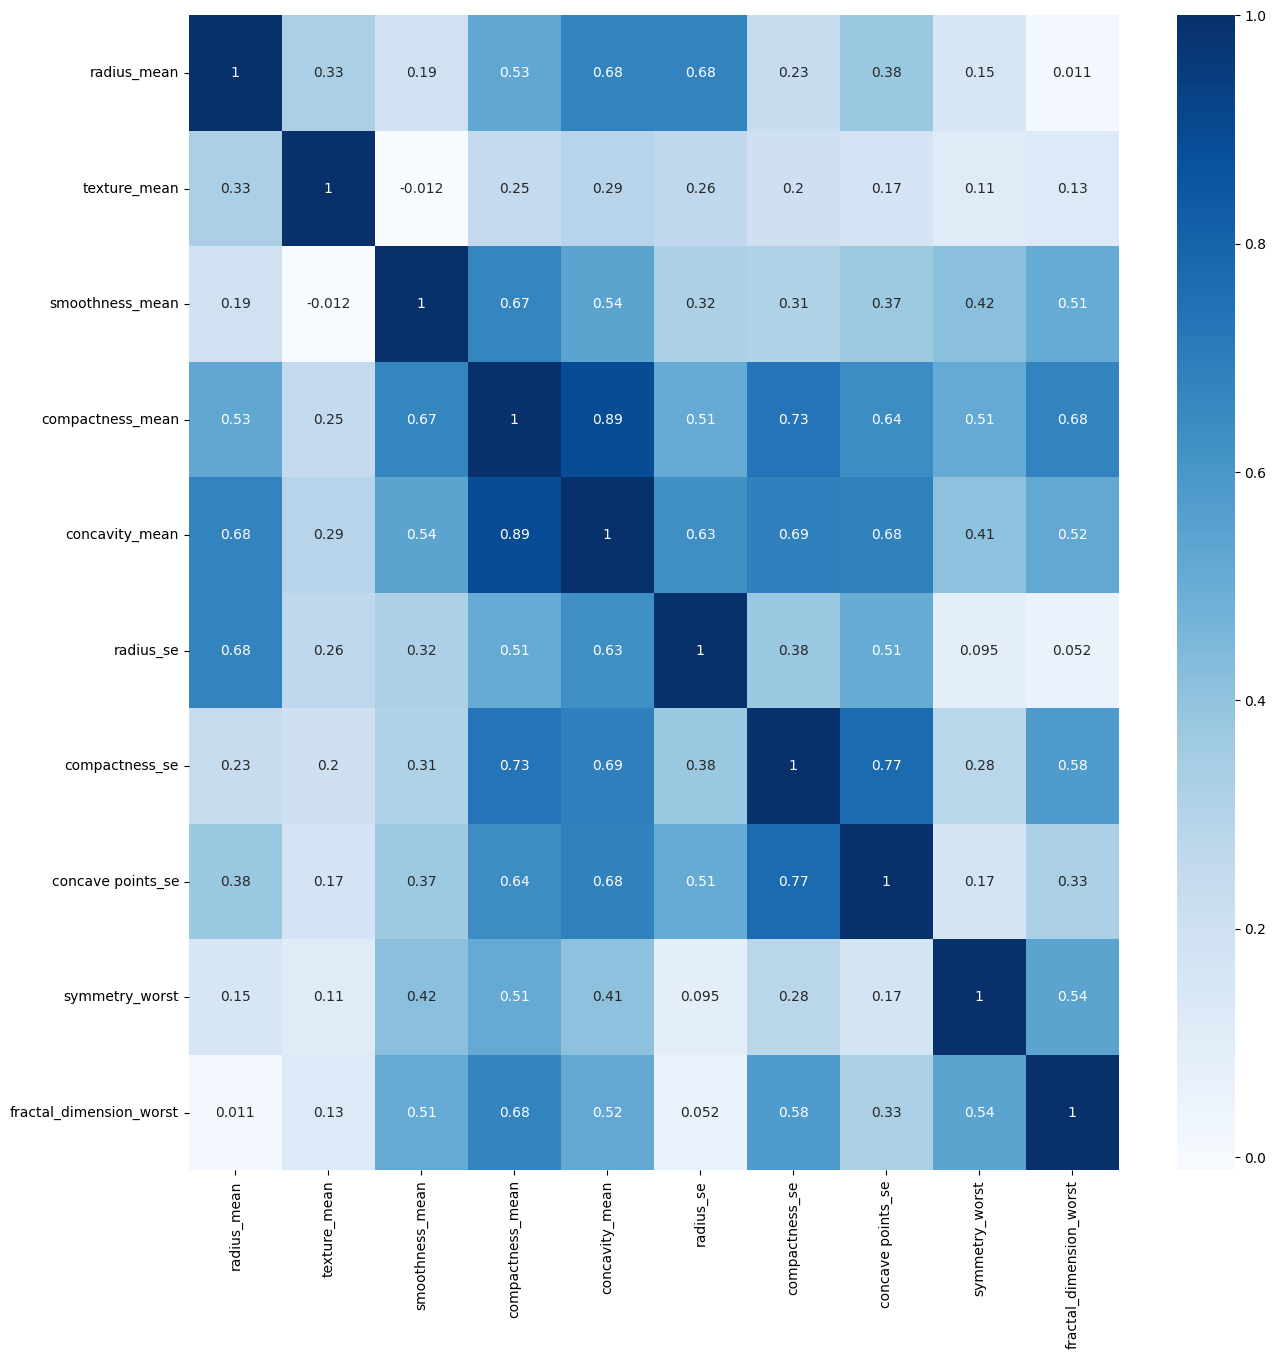

In [90]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[feat_segunda].corr(), annot=True, cmap= 'Blues')

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [91]:
X_train_reduction = X_train[feat_segunda]
rf_clf_all = RandomForestClassifier(max_depth = 5, random_state= 42)
score = np.mean(cross_val_score(rf_clf_all, X_train_reduction, y_train, cv = 5, scoring = 'balanced_accuracy'))
resultados['reduction_feat'] = score

In [92]:
resultados

{'todas_feat': np.float64(0.9506707946336428),
 'reduction_feat': np.float64(0.9424148606811146)}

### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [94]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
lista_ANOVA = X_train_kbest.columns.to_list()

In [106]:
lista_ANOVA

['perimeter_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst']

In [96]:
X_train_anova = X_train[lista_ANOVA]
rf_clf_all = RandomForestClassifier(max_depth = 5, random_state= 42)
score = np.mean(cross_val_score(rf_clf_all, X_train_anova, y_train, cv = 5, scoring = 'balanced_accuracy'))
resultados['ANOVA_feat'] = score

In [97]:
resultados

{'todas_feat': np.float64(0.9506707946336428),
 'reduction_feat': np.float64(0.9424148606811146),
 'ANOVA_feat': np.float64(0.9353973168214654)}

### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [ ]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state= 42, max_depth = 5) # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train, y_train)
print(rfe.ranking_)


[ 5 11  6  2 14 16  3  1 22 23 15 21 12 13 24 25 19 26 20 18  1  4  1  1
 10  9  8  1  7 17]


array(['concave points_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'], dtype=object)

In [104]:
X_train_rfe = pd.DataFrame(rfe.transform(X_train), columns = rfe.get_feature_names_out())
lista_rfe = X_train_rfe.columns.to_list()

In [107]:
lista_rfe

['concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [105]:
X_train_rfe = X_train[lista_rfe]
rf_clf = RandomForestClassifier(max_depth = 5, random_state= 42)
score = np.mean(cross_val_score(rf_clf_all, X_train_rfe, y_train, cv = 5, scoring = 'balanced_accuracy'))
resultados['RFE_feat'] = score
resultados

{'todas_feat': np.float64(0.9506707946336428),
 'reduction_feat': np.float64(0.9424148606811146),
 'ANOVA_feat': np.float64(0.9353973168214654),
 'RFE_feat': np.float64(0.9353973168214654)}

### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [108]:
rf_clf = RandomForestClassifier(max_depth = 5, random_state= 42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

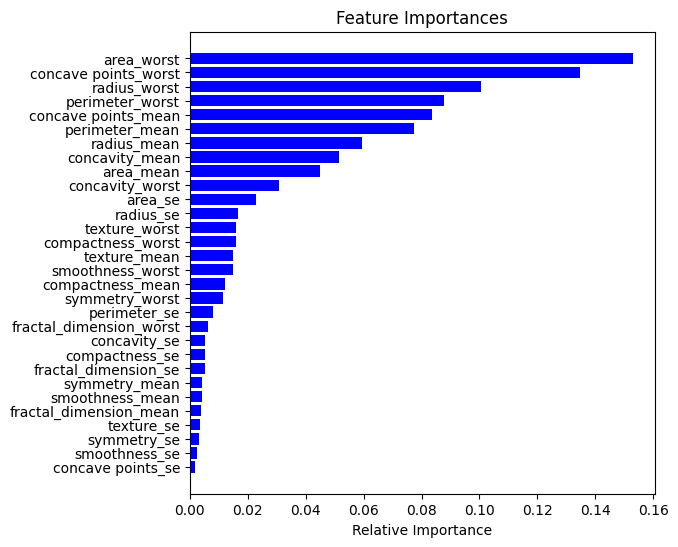

In [113]:
importancias = rf_clf.feature_importances_
indices = np.argsort(importancias)

plt.figure(figsize=(6, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importancias[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [114]:
from sklearn.feature_selection import SelectFromModel

selector_model = SelectFromModel(estimator = rf_clf, threshold= "median")
selector_model.fit(X_train, y_train)
selector_model.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype=object)

In [116]:
X_train_model = pd.DataFrame(selector_model.transform(X_train), columns = selector_model.get_feature_names_out())
lista_modelo = X_train_model.columns.to_list()

### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.